Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

Data collection and preprocessing 

In [2]:
# loading the csv data a pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# print the first 5 rows in a dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last 5 rows in a dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.   Positive correlation
2.   Negetive correlation

In [8]:
correlation = gold_data.corr()

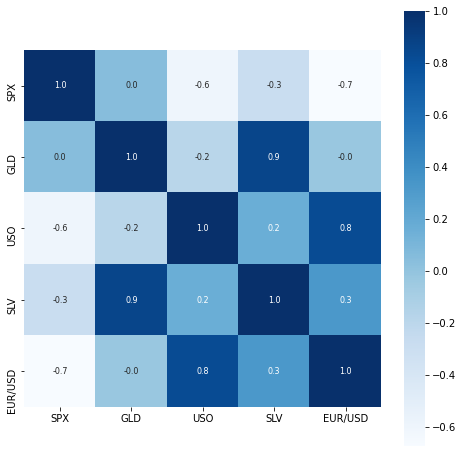

In [9]:
# constructing a heatmap to understand the correlation 
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [10]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


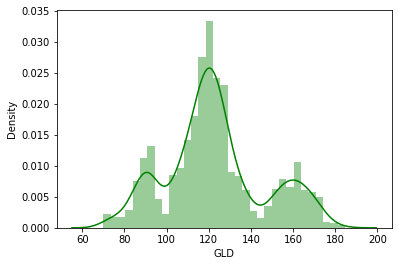

In [11]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color='green')

Splitting the features and target

In [12]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [13]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [14]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting the data into a Training&Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training: Random Forest Regressor

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Evaluation

In [18]:
# predection on test data
test_data_prediction = regressor.predict(X_test)

In [19]:
test_data_prediction

array([168.79079983,  82.16949994, 116.04690087, 127.63790072,
       120.70690156, 154.75829791, 150.15129804, 126.15730056,
       117.56329895, 126.04740072, 116.95690112, 171.47270081,
       140.88159856, 168.02059843, 114.95270013, 117.81880069,
       138.04330369, 170.15430045, 158.62020217, 161.06410041,
       155.12539987, 125.2079001 , 175.93490019, 157.0654033 ,
       125.21030032,  93.95350005,  77.0831002 , 120.60100006,
       119.03329879, 167.05580034,  88.14220058, 125.3213002 ,
        91.12240072, 117.66720027, 121.04939914, 136.51910071,
       115.38280102, 115.38010077, 145.68310028, 107.48940137,
       104.25510224,  87.27699808, 126.58240064, 117.88500003,
       152.6065984 , 119.64260003, 108.36129987, 107.99359789,
        93.27730102, 127.00449826,  74.49950036, 113.60369953,
       121.39329986, 111.21069894, 118.906999  , 120.82929958,
       159.94379982, 167.31530107, 146.87869672,  86.09889857,
        94.2243002 ,  86.88219881,  90.55620046, 118.94

In [20]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f'R squared error: {error_score}')

R squared error: 0.9897870480933569


Compare the acutal values and predicted values

In [21]:
Y_test = list(Y_test)

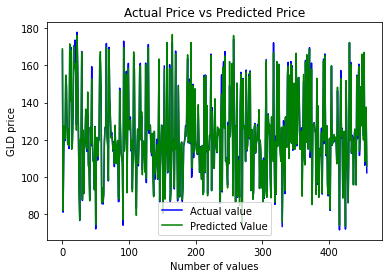

In [22]:
plt.plot(Y_test, color='blue', label='Actual value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()